## Computing the length of linkers throught SMILES 

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd

In [2]:
# Function to compute length of linkers by SMILES 
def get_max_length(smiles: str) -> float:
    mol = Chem.MolFromSmiles(smiles)
    # Add hydrogen atoms to the molecule 
    mol = Chem.AddHs(mol)
    # Generate 3D coordinates
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())

    # Optimize the geometry
    AllChem.UFFOptimizeMolecule(mol)

    # Calculate the maximum distance between any two atoms
    coords = mol.GetConformer().GetPositions()

    return np.max([np.linalg.norm(coords[i]- coords[j]) for i in range(len(coords)) for j in range(i+1, len(coords))])


In [3]:
# load predictions for QMOF
tp = pd.read_csv("T_P_qmof.csv", index_col=0)
gm = pd.read_csv("ges_mol_qmof.csv", index_col=0)
no = pd.read_csv("no_pred_qmof.csv", index_col=0)

In [4]:
len(tp),len(gm),len(no)

(1646, 539, 5278)

In [10]:
# load linker data for QMOF
data = pd.read_csv("../preprocessing/qmof/data/qmof_property_cell.csv", index_col=1)

In [17]:
# Works ~ 1 min
tp_lengths = pd.DataFrame(columns=["max_len"])
bad_count = 0
for name in tp.index:
    smi = data["smilesLinkers"].loc[name]
    ss = smi.split(",") # split 'linker1,linker2' to ['linker1', 'linker2']
    curr_lengths = []

    for s in ss:
        try:
            curr_len = get_max_length(s)
            curr_lengths.append(curr_len)
        except Exception:
            bad_count += 1
            
            # print(s)
        
    if curr_lengths:
        tp_lengths.loc[name] = [max(curr_lengths)]

[12:18:05] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[12:18:05] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[12:18:05] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[12:18:05] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[12:18:06] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[12:18:06] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[12:18:06] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[12:18:06] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[12:18:06] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[12:18:06] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[12:18:06] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[12:18:06] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[12:18:07] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[12:18:07] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[12:18:07] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[12:18:07] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[12:18:07] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[12:18:07] UFFTYPER: Unrecognized atom type: S_5+4 (17

In [19]:
# Works ~30 sec
gm_lengths = pd.DataFrame(columns=["max_len"])
bad_count = 0
for name in gm.index:
    smi = data["smilesLinkers"].loc[name]
    ss = smi.split(",")
    curr_lengths = []

    for s in ss:
        try:
            curr_len = get_max_length(s)
            curr_lengths.append(curr_len)
        except Exception:
            bad_count += 1
            
            print(s)
        
    if curr_lengths:
        gm_lengths.loc[name] = [max(curr_lengths)]


[12:19:25] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:25] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:25] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[12:19:25] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[12:19:33] UFFTYPER: Unrecognized atom type: S_5+4 (27)
[12:19:33] UFFTYPER: Unrecognized atom type: S_5+4 (27)
[12:19:33] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[12:19:33] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[12:19:34] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[12:19:34] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[12:19:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:36] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[12:19:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:36] UFFTYPER: Unrecognized atom type: S_5+4 (30)


C(=C[CH]C(C=CC=CC1=C[N]N=C1)(C=CC=CC1=C[N]N=C1)C=CC=C[C]1C=NN=C1)[CH]C1=C[N]N=C1


[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[12:19:38] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[12:19:44] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:44] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[12:19:44] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:44] UFFTYPER: Unrecognized atom type: S_5+4 (2)


n1ccc(cc1)C1C2c3ccc(C1C2c1ccncc1)cc3


[12:19:49] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[12:19:49] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[12:19:49] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[12:19:49] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[12:19:49] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:49] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[12:19:49] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[12:19:49] UFFTYPER: Unrecognized atom type: S_5+4 (22)


In [156]:
# Attention: this part work ~20 min
no_lengths = pd.DataFrame(columns=["max_len"])
bad_count = 0
for name in no.index:
    smi = data["smilesLinkers"].loc[name]
    ss = smi.split(",")
    curr_lengths = []

    for s in ss:
        try:
            curr_len = get_max_length(s)
            curr_lengths.append(curr_len)
        except Exception:
            bad_count += 1
            
            print(s)
        
    if curr_lengths:
        no_lengths.loc[name] = [max(curr_lengths)]


[18:08:51] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9
[18:08:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[18:08:51] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[18:08:51] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[18:08:51] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[18:08:51] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[18:08:51] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[18:08:51] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[18:08:51] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[18:08:51] UFFTYPER: Unrecognized atom type: S_5+4 (21)


[O-]C(=O)c1ccc2c(c1)c[n-][nH]2
Cc1cc([n-]n1CCCCn1[n-]c(cc1C)C)C


[18:08:51] Explicit valence for atom # 3 N, 4, is greater than permitted


COC1=[N]=C(OC)C(=C([C]1OC)c1c(I)c(I)c(c(c1I)I)C1=C(OC)C(=[N]=C([C]1OC)OC)OC)OC


[18:08:52] Explicit valence for atom # 8 N, 4, is greater than permitted


N#Cc1c(C#N)c2C(=[N]=C(c3c2c2c1C(=[N]=C(c2c(c3C#N)C#N)O)O)O)O


[18:08:52] Explicit valence for atom # 12 N, 4, is greater than permitted
[18:08:52] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[18:08:52] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[18:08:52] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[18:08:52] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[18:08:52] Can't kekulize mol.  Unkekulized atoms: 8 9 12


OC(=O)c1c(C(=O)O)c(C2=NC3=[N]=C(N=C4N3C(=NC(=N4)c3c(C(=O)O)c(C(=O)O)c(c(c3C(=O)O)C(=O)O)C(=O)[O-])[N]2)c2c(C(=O)O)c(C(=O)O)c(c(c2C(=O)O)C(=O)O)C(=O)[O-])c(c(c1C(=O)[O-])C(=O)O)C(=O)O
[O]S(c1cc(ccc1c1c[n-][nH]c1)c1c[n-][nH]c1)([O])[O]


[18:08:53] Explicit valence for atom # 4 N, 4, is greater than permitted
[18:08:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[18:08:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:08:53] Explicit valence for atom # 6 N, 4, is greater than permitted
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (14)


NC1=NC(=[N]=C([N]1)C)N
[O]c1ccccc1C=[NH]CC[NH]=Cc1ccccc1[O]
S=[C]1=NC(=CC=N1)c1ccncc1
[O-]C(=O)C#CC1=[N]=C(N=C([N]1)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-])C#CC(=O)[O-]


[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[18:08:53] UFFTYPER: Unrecognized atom type: S_5+4 (28)


KeyboardInterrupt: 

In [23]:
# save max lengths for optimized geometry
no_lengths.to_csv("linker_lengths/no_lengths_opt.csv")
tp_lengths.to_csv("linker_lengths/tp_lengths_opt.csv")
gm_lengths.to_csv("linker_lengths/gm_lengths_opt.csv")

## Compute plots and statistics from already computed files of length of linkers

In [24]:
import pandas as pd

no_lengths = pd.read_csv("linker_lengths/no_lengths_opt.csv", index_col=0)
tp_lengths = pd.read_csv("linker_lengths/tp_lengths_opt.csv", index_col=0)
gm_lengths = pd.read_csv("linker_lengths/gm_lengths_opt.csv", index_col=0)

In [155]:
mofid_data = pd.read_csv("../preprocessing/mofid/mofid_data_.csv", index_col=0)

target =  pd.read_csv("../preprocessing/datasets/main_target.csv",index_col=0)

linkers = pd.DataFrame([[smi.strip('"')[1:-1].replace("'", "").split(", ")] for smi in mofid_data['linker'].values], index=mofid_data.index, columns=["linker"])

In [150]:
main_lengths = pd.DataFrame(columns=["max_length", "target"])
bad_count = 0
for name in target.index:
    if name in linkers.index:
        ss = linkers["linker"].loc[name]
        curr_lengths = []

        for s in ss:
            try:
                curr_len = get_max_length(s)
                curr_lengths.append(curr_len)
            except Exception:
                bad_count += 1
                print(s)
            
        if curr_lengths:
            main_lengths.loc[name] = [max(curr_lengths), target.loc[name]["target"]]

n1ccc(cc1)C1C2c3ccc(C1C2c1ccncc1)cc3


In [29]:
# For compute statistics of data 
def get_statistics(distribution):
    res = {}
    res["Mean"] = np.mean(distribution)
    res["Std"] = np.std(distribution)
    print(f"\tMean (+- std): {res['Mean']:.2f} (+- {res['Std']:.2f}) Å")
    count, edge = np.histogram(distribution, bins=20)
    i = np.argmax(count)
    mode_bin = [edge[i], edge[i+1]]
    res["Mode"] = np.mean(mode_bin)
    res["Dev"] = (mode_bin[1] - mode_bin[0])/2
    print(f"\tMode: {res['Mode']:.2f} (+- {res['Dev']:.2f}) Å")

    res["Median"] = np.median(distribution)
    print(f"\tMedian: {res['Median']:.2f} Å")

    res["Q1"], res["Q2"], res["Q3"] = np.percentile(distribution, [25, 50, 75])

    print(f"\tQuantiles:\n\t25% - {res['Q1']:.2f} Å\n\t50% - {res['Q2']:.2f} Å\n\t75% - {res['Q3']:.2f} Å")
    return res


(-0.06503799546601652, 26.82309420130106)

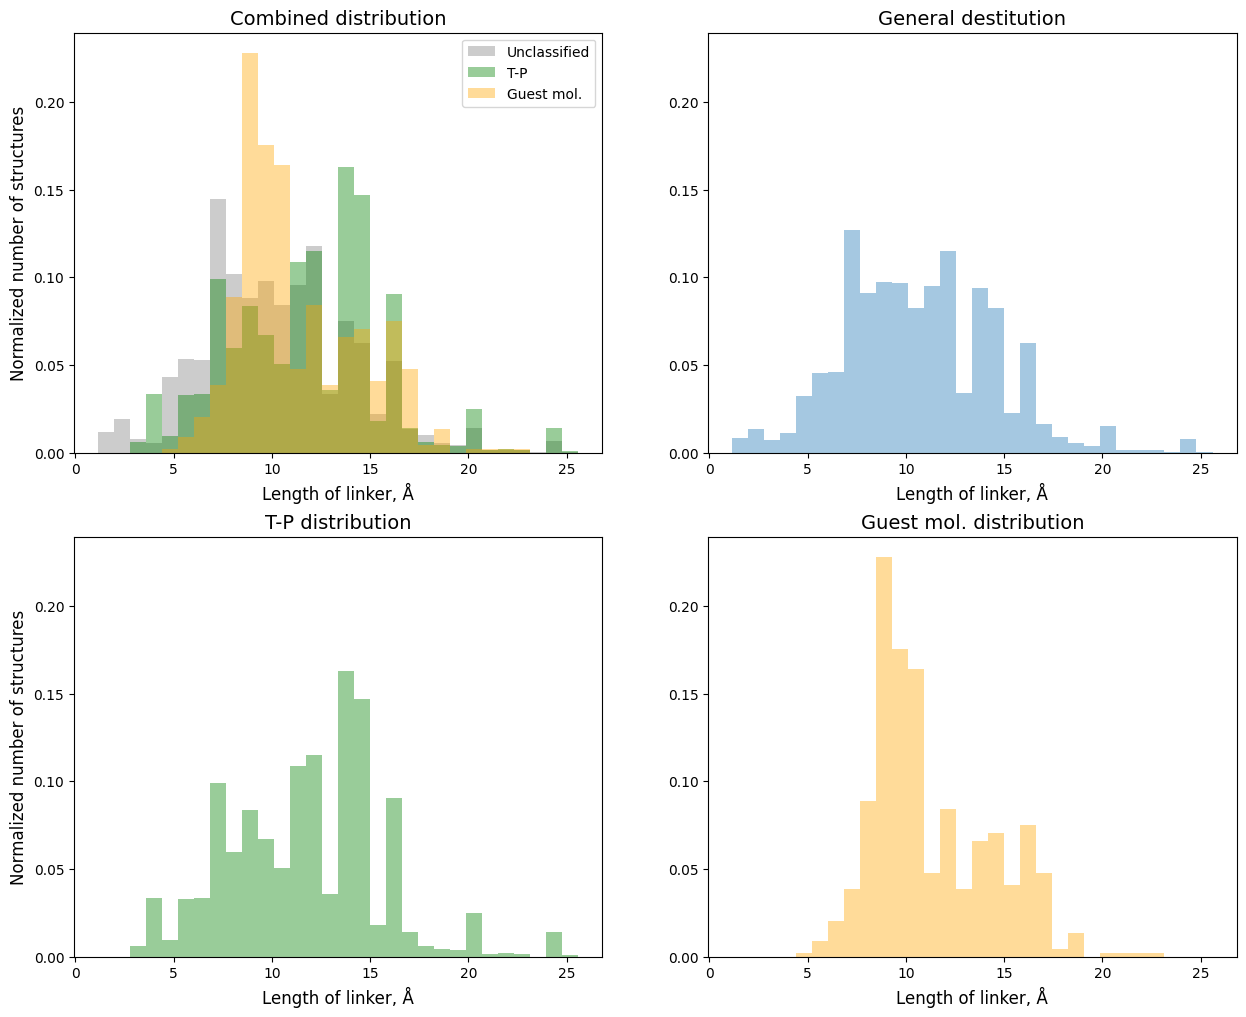

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

x1, bins, patch = ax1.hist(no_lengths.values[:, 0], bins = 30,density=True, alpha=0.4, label="Unclassified", color='gray')
ax1.hist(tp_lengths.values[:, 0],bins = bins, alpha=0.4,density=True, label="T-P", color='green')
ax1.hist(gm_lengths.values[:, 0],bins = bins, alpha=0.4,density=True, label="Guest mol.", color='orange')
ax1.set_title("Combined distribution", fontsize=14)
# ax1.set_title("With hydrogen and optimize the geometry ")
ax1.set_xlabel("Length of linker, Å", fontsize=12)
ax1.set_ylabel("Normalized number of structures", fontsize=12)
ax1.legend()

ax2.hist(np.concatenate([no_lengths.values[:, 0], tp_lengths.values[:, 0], gm_lengths.values[:, 0]]),bins = bins,density=True, alpha=0.4)
ax2.set_title("General destitution", fontsize=14)
ax2.set_xlabel("Length of linker, Å", fontsize=12)
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())


ax3.hist(tp_lengths.values[:, 0], label="T-P",bins = bins,density=True, alpha=0.4, color='green')
ax3.set_title("T-P distribution", fontsize=14)
ax3.set_xlabel("Length of linker, Å", fontsize=12)
ax3.set_ylabel("Normalized number of structures", fontsize=12)
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlim(ax1.get_xlim())
# ax3.legend()


ax4.hist(gm_lengths.values[:, 0], label="Guest mol",bins = bins,density=True, alpha=0.4, color='orange')
ax4.set_title("Guest mol. distribution", fontsize=14)
ax4.set_xlabel("Length of linker, Å", fontsize=12)
ax4.set_ylim(ax1.get_ylim())
ax4.set_xlim(ax1.get_xlim())
# ax4.legend()


In [157]:
# Save statistics of data in dataframe
stats = pd.DataFrame(columns=["Mean", "Std", "Mode", "Dev", "Median", "Q1", "Q2", "Q3"])

print("T/P QMOF")
stats.loc["T/P QMOF"] = get_statistics(tp_lengths.values[:, 0])

print("Guest mol. QMOF")
stats.loc["Guest mol. QMOF"] = get_statistics(gm_lengths.values[:, 0])

print("No prediction QMOF")
stats.loc["No prediction QMOF"] = get_statistics(no_lengths.values[:, 0])

print("General distribution QMOF")
stats.loc["General distribution QMOF"] = get_statistics(np.concatenate([no_lengths.values[:, 0], tp_lengths.values[:, 0], gm_lengths.values[:, 0]]))

T/P QMOF
	Mean (+- std): 11.81 (+- 3.83) Å
	Mode: 13.84 (+- 0.56) Å
	Median: 12.04 Å
	Quantiles:
	25% - 8.98 Å
	50% - 12.04 Å
	75% - 14.21 Å
Guest mol. QMOF
	Mean (+- std): 11.37 (+- 3.17) Å
	Mode: 9.48 (+- 0.70) Å
	Median: 10.31 Å
	Quantiles:
	25% - 9.19 Å
	50% - 10.31 Å
	75% - 13.64 Å
No prediction QMOF
	Mean (+- std): 10.47 (+- 4.20) Å
	Mode: 9.46 (+- 0.55) Å
	Median: 9.77 Å
	Quantiles:
	25% - 7.58 Å
	50% - 9.77 Å
	75% - 12.49 Å
General distribution QMOF
	Mean (+- std): 11.64 (+- 3.72) Å
	Mode: 13.68 (+- 0.76) Å
	Median: 11.67 Å
	Quantiles:
	25% - 9.18 Å
	50% - 11.67 Å
	75% - 14.20 Å


(-0.06503799546601652, 26.82309420130106)

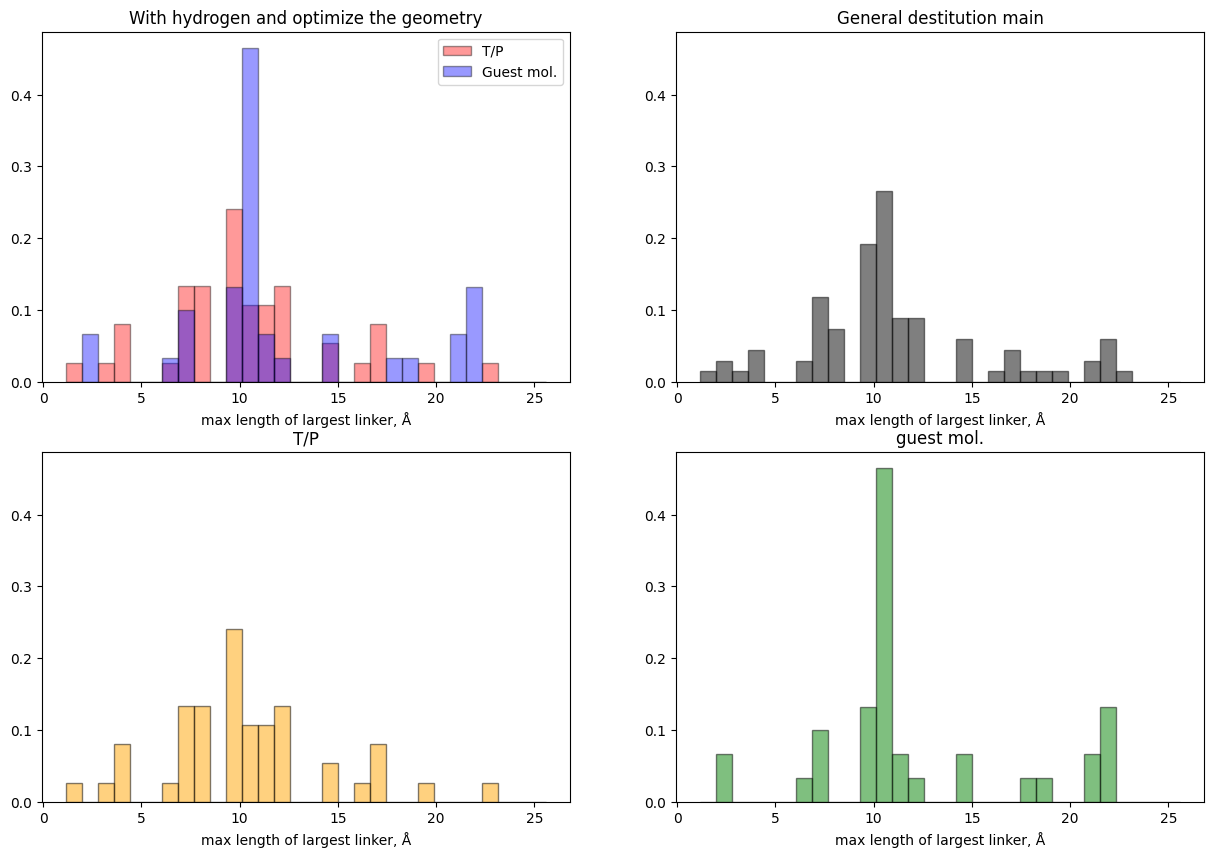

In [158]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# x1, bins, patch = ax1.hist(main_lengths.max_length.values, density=True, bins = 30, alpha=0.4, label="no prediction", color='gray')
ax1.hist(main_lengths.max_length.loc[main_lengths.target == 1].values, bins = bins, density=True, alpha=0.4, label="T/P", color='red', edgecolor="black", stacked=True)
ax1.hist(main_lengths.max_length.loc[main_lengths.target == 0].values,bins = bins, density=True, alpha=0.4, label="Guest mol.", color='blue', edgecolor="black", stacked=True)
ax1.set_title("With hydrogen and optimize the geometry")
ax1.set_xlabel("max length of largest linker, Å")
ax1.legend()

ax2.hist(main_lengths.max_length.values,bins = bins, density=True, alpha=0.5, color='black', edgecolor="black", stacked=True)
ax2.set_title("General destitution main")
ax2.set_xlabel("max length of largest linker, Å")
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())


ax3.hist(main_lengths.max_length.loc[main_lengths.target == 1],bins = bins, density=True, alpha=0.5, color='orange', edgecolor="black")
ax3.set_title("T/P")
ax3.set_xlabel("max length of largest linker, Å")
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlim(ax1.get_xlim())


ax4.hist(main_lengths.max_length.loc[main_lengths.target == 0],bins = bins, density=True, alpha=0.5, color='green', edgecolor="black")
ax4.set_title("guest mol.")
ax4.set_xlabel("max length of largest linker, Å")
ax4.set_ylim(ax1.get_ylim())
ax4.set_xlim(ax1.get_xlim())

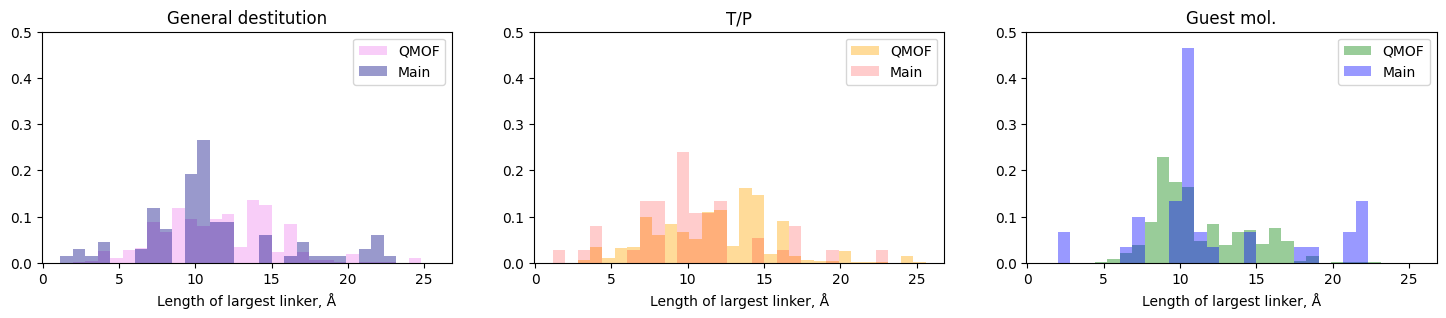

In [159]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 3))


ax1.hist(np.concatenate([no_lengths.values[:, 0], tp_lengths.values[:, 0], gm_lengths.values[:, 0]]),bins = bins, density=True, alpha=0.4, color='violet', label="QMOF")

ax1.hist(main_lengths.max_length.values,bins = bins, density=True, alpha=0.4, color='navy', label="Main")

ax1.set_title("General destitution")
ax1.set_xlabel("Length of largest linker, Å")
ax1.set_ylim(0, 0.5)
# ax1.set_xlim()

ax1.legend()


ax2.hist(tp_lengths.values[:, 0],bins = bins, density=True, alpha=0.4, color='orange', label="QMOF")
ax2.hist(main_lengths.max_length.loc[main_lengths.target == 1],bins = bins, density=True, alpha=0.2, color='red', label="Main")

ax2.set_title("T/P")
ax2.set_xlabel("Length of largest linker, Å")
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())
ax2.legend()

ax3.hist(gm_lengths.values[:, 0],bins = bins, density=True, alpha=0.4, color='green', label="QMOF")
ax3.hist(main_lengths.max_length.loc[main_lengths.target == 0],bins = bins, density=True, alpha=0.4, color='blue', label="Main")
ax3.set_title("Guest mol.")
ax3.set_xlabel("Length of largest linker, Å")
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlim(ax1.get_xlim())
ax3.legend()


In [160]:
print("T/P Main")
stats.loc["T/P Main"] = get_statistics(main_lengths.max_length.loc[main_lengths.target == 0])

print("Guest mol. Main")
stats.loc["Guest mol. Main"] = get_statistics(main_lengths.max_length.loc[main_lengths.target == 1])

print("General distribution Main")
stats.loc["General distribution Main"] = get_statistics(main_lengths.max_length)

T/P Main
	Mean (+- std): 12.16 (+- 5.11) Å
	Mode: 10.53 (+- 0.49) Å
	Median: 10.68 Å
	Quantiles:
	25% - 9.98 Å
	50% - 10.68 Å
	75% - 14.28 Å
Guest mol. Main
	Mean (+- std): 10.34 (+- 4.11) Å
	Mode: 10.25 (+- 0.53) Å
	Median: 9.99 Å
	Quantiles:
	25% - 7.90 Å
	50% - 9.99 Å
	75% - 11.90 Å
General distribution Main
	Mean (+- std): 11.15 (+- 4.67) Å
	Mode: 10.25 (+- 0.53) Å
	Median: 10.42 Å
	Quantiles:
	25% - 8.13 Å
	50% - 10.42 Å
	75% - 12.02 Å


In [153]:
stats

,Mean,Std,Mode,Dev,Median,Q1,Q2,Q3
T/P QMOF,11.806246,3.834210,13.843605,0.557740,12.039112,8.981408,12.039112,14.209383
Guest mol. QMOF,11.369933,3.165915,9.483960,0.704389,10.306968,9.194043,10.306968,13.642799
No prediction QMOF,10.357563,3.868708,7.879183,0.611094,9.976370,7.579703,9.976370,12.519933
General distribution QMOF,10.761496,3.863686,9.839350,0.789291,10.447454,7.885657,10.447454,13.640688
T/P Main,12.155457,5.111283,10.527072,0.486959,10.679796,9.976370,10.679796,14.276767
Guest mol. Main,10.340317,4.105928,10.245044,0.530917,9.990647,7.901230,9.990647,11.899319
General distribution Main,11.149476,4.669424,10.245044,0.530917,10.423805,8.132857,10.423805,12.019171
